# Day 9 Notes 
## Author: Kush Mehta

In [3]:
# Find working directory on your local computer; yours will be different from mine
import os
path = os.getcwd()
print(path)

/Users/kush/Python


In [5]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Import data
college = pd.read_csv('http://672258.youcanlearnit.net/college.csv')

In [11]:
# data's info
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1269 non-null   int64  
 1   name                1269 non-null   object 
 2   city                1269 non-null   object 
 3   state               1269 non-null   object 
 4   region              1269 non-null   object 
 5   highest_degree      1269 non-null   object 
 6   control             1269 non-null   object 
 7   gender              1269 non-null   object 
 8   admission_rate      1269 non-null   float64
 9   sat_avg             1269 non-null   int64  
 10  undergrads          1269 non-null   int64  
 11  tuition             1269 non-null   int64  
 12  faculty_salary_avg  1269 non-null   int64  
 13  loan_default_rate   1267 non-null   float64
 14  median_debt         1269 non-null   float64
 15  lon                 1269 non-null   float64
 16  lat   

### Crosstabs
- Show frequency and relative frequency of values in variables

In [19]:
# Frequency by school type and region
pd.crosstab(college['control'],college['region'],margins=True)

region,Midwest,Northeast,South,West,All
control,,,,,
Private,246,185,250,82,763
Public,107,114,209,76,506
All,353,299,459,158,1269


In [21]:
# Frequency by gender and highest degree offered
pd.crosstab(college['gender'],college['highest_degree'],margins=True)

highest_degree,Associate,Bachelor,Graduate,All
gender,,,,
CoEd,20,191,1026,1237
Men,0,3,1,4
Women,0,6,22,28
All,20,200,1049,1269


In [27]:
# Relative frequency by school type and region: joint probabilities
pd.crosstab(college['control'],college['region'],margins=True, normalize=True).round(2)

region,Midwest,Northeast,South,West,All
control,,,,,
Private,0.19,0.15,0.20,0.06,0.6
Public,0.08,0.09,0.16,0.06,0.4
All,0.28,0.24,0.36,0.12,1.0


In [33]:
# Relative frequency by gender and highest degree offered
pd.crosstab(college['gender'],college['highest_degree'],margins=True, normalize=True).round(4)

highest_degree,Associate,Bachelor,Graduate,All
gender,,,,
CoEd,0.0158,0.1505,0.8085,0.9748
Men,0.0000,0.0024,0.0008,0.0032
Women,0.0000,0.0047,0.0173,0.0221
All,0.0158,0.1576,0.8266,1.0000


## Pivot Tables
- summarize data


In [44]:
# Mean of SAT Scores
pivot1 = college.pivot_table(values='sat_avg',
                            index='region',
                            aggfunc='mean')
pivot1.round(2)

,sat_avg
region,
Midwest,1069.48
Northeast,1069.54
South,1033.78
West,1093.02


In [50]:
# Mean of SAT Scores by region and school type
pivot2 = college.pivot_table(values='sat_avg',
                            index='region',
                            columns='control',
                            aggfunc='mean')
pivot2.round(2)

control,Private,Public
region,,
Midwest,1073.17,1060.98
Northeast,1095.90,1026.75
South,1040.16,1026.14
West,1123.16,1060.50


In [54]:
# Mean of tuition by region and highest degree offered
pivot3 = college.pivot_table(values='tuition',
                            index='region',
                            columns='highest_degree',
                            aggfunc='mean')
pivot3.round(2)

highest_degree,Associate,Bachelor,Graduate
region,,,
Midwest,14812.67,27333.48,21045.54
Northeast,15757.50,24479.59,25593.47
South,8845.17,19101.30,17143.02
West,4536.00,26202.07,21082.03


In [58]:
# Mean of SAT Score by region and THEN school type
pivot4 = college.pivot_table(values='sat_avg',
                            index=['region', 'control'],
                            aggfunc='mean')
pivot4.round(2)

sat_avg
region    control         
Midwest   Private  1073.17
          Public   1060.98
Northeast Private  1095.90
          Public   1026.75
South     Private  1040.16
          Public   1026.14
West      Private  1123.16
          Public   1060.50

In [62]:
# Mean and standard deviation of tuition by school type and THEN region
pivot5 = college.pivot_table(values='tuition',
                            index=['control', 'region'],
                            aggfunc=['mean','std'])
pivot5.round(2)

mean       std
                    tuition   tuition
control region                       
Private Midwest    27765.22   7931.47
        Northeast  34317.95   8776.95
        South      25297.02   9159.37
        West       33369.78  10253.83
Public  Midwest     9124.07   2226.10
        Northeast  10660.30   2935.86
        South       7653.22   2234.66
        West        8549.66   2659.54

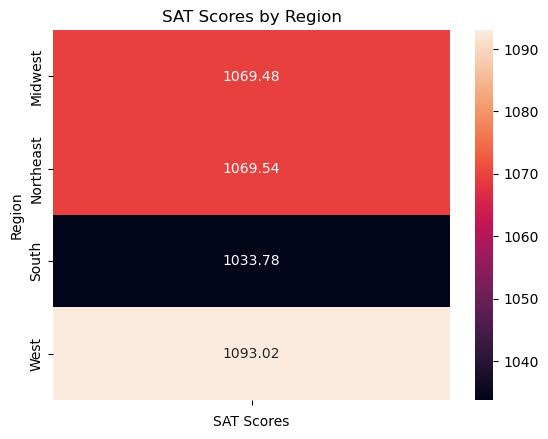

In [70]:
# Plot pivot table 1 above
heatmap1 = sns.heatmap(pivot1, annot = True, fmt='g')
heatmap1.set(title='SAT Scores by Region',
            xlabel = 'SAT Scores', ylabel= 'Region', 
            xticklabels = []);

In [3]:
# Plot pivot table 2
heatmap2 = sns.heatmap(pivot2, annot = True, fmt='g')
heatmap1.set(title='SAT Scores by Region and School Type',
            xlabel = 'SAT Scores', ylabel= 'Region',
            xticklabels = ['Public Schools ']);

NameError: name 'sns' is not defined